# Understanding Surface Properties (4): Heat Storage and Surface Resistance

## Objectives

1. Understand how to calculate ground heat flux.
3. Understand how to back-calculate surface resistance. 


## Calculation of heat storage: OHM (Objective Hysteresis Model) and a simple scheme

The objective hysteresis model helps us estimate the ground surface heat flux using the measured net radiation data. The equation for this model is as follows:

$$
\Delta Q_{S}=a_{1} Q^{*}+a_{2} \frac{\partial Q^{*}}{\partial t}+a_{3}
$$

where $\Delta Q_S$ is the ground heat flux (W m$^{-2}$), $Q^*$ is the net radiation (W m$^{-2}$), and $a_{1-3}$ are the coefficients to be determined from measurements

In this task, we focus on a simpler model instead of the above question using just the first term:

$$
\Delta Q_{S}=a_{1} Q^{*}
$$

The aim is to find $a_1$ using the measurements.

### Tasks

#### Load necessary packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

#### Loading data

In [2]:
group_number = 7
path_dir = Path.cwd() / 'data' / f'{group_number}'
# examine available files in your folder
list(path_dir.glob('*gz'))

[PosixPath('/Users/hamidrezaomidvar/Desktop/BLM-task4/data/7/US-Whs_clean.csv.gz'),
 PosixPath('/Users/hamidrezaomidvar/Desktop/BLM-task4/data/7/US-NC1_clean.csv.gz')]

In [3]:
# specify the site name
name_of_site = 'US-Whs'

In [4]:
# load dataset
site_file = name_of_site + '_clean.csv.gz'
path_data = path_dir / site_file
df_data = pd.read_csv(path_data, index_col='time', parse_dates=['time'])
df_data.head()

,WS,RH,TA,PA,WD,P,SWIN,LWIN,SWOUT,LWOUT,NETRAD,H,LE,USTAR,ZL
time,,,,,,,,,,,,,,,
2007-06-29 13:30:00,4.063,12.6475,34.790,86.3667,273.75,0.0,1096.50,NaN,NaN,NaN,609.9,339.3645,12.2582,0.4036,NaN
2007-06-29 14:00:00,3.636,12.2413,35.140,86.3323,322.30,0.0,1057.00,NaN,NaN,NaN,562.8,290.9766,14.5989,0.5052,NaN
2007-06-29 14:30:00,3.107,12.0811,35.490,86.3048,316.75,0.0,1107.50,NaN,NaN,NaN,596.4,359.2087,16.1474,0.3566,NaN
2007-06-29 15:00:00,4.302,11.6801,36.190,86.2589,292.30,0.0,1108.00,NaN,NaN,NaN,613.5,360.5630,10.0565,0.5340,NaN
2007-06-29 15:30:00,3.676,13.7432,34.785,86.2429,209.20,0.0,496.15,NaN,NaN,NaN,232.0,200.0689,64.8520,0.4503,NaN


Assuming surface energy closure in measurements is perfect, i.e., $Q^*=Q_H+Q_E+\Delta Q_S$

Note: conduct the derivation at different sites separately so you can get two sets of coefficients for later comparison.

#### Calculating $\Delta Q_S$

Text(0, 0.5, '$\\Delta Q_S$')

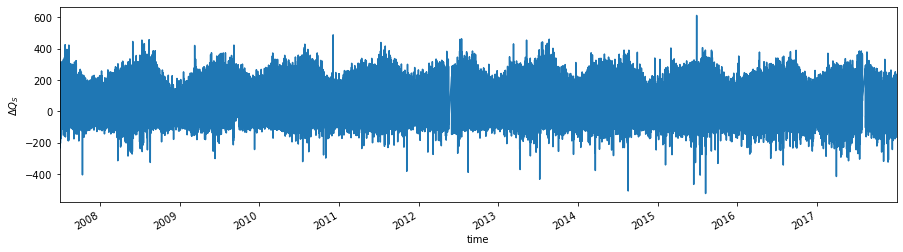

In [5]:
df=df_data.filter(['NETRAD','H','LE'])
df.dropna(inplace=True)
QSTAR=df.NETRAD
QH=df.H
QE=df.LE

QS=QSTAR-QH-QE


QS.plot(figsize=(15,4))
plt.ylabel('$\Delta Q_S$')


#### Finding $a_1$

Text(0.5, 0, '$Q^*$')

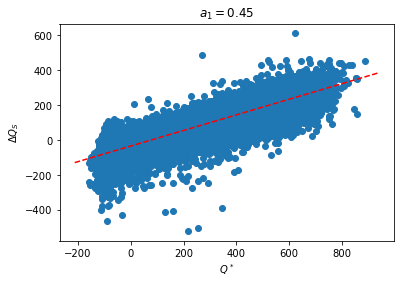

In [6]:
from scipy.stats import linregress

fig, ax = plt.subplots(1, 1)
slope = linregress(QSTAR, QS).slope
intercept=linregress(QSTAR, QS).intercept

ax.scatter(QSTAR, QS)
lim = ax.get_xlim()
plt.plot(lim, [x * slope+intercept for x in lim], color='r', linestyle='--')
plt.title(f'$a_1 = {slope:.2f}$')
plt.ylabel('$\Delta Q_S$')
plt.xlabel('$Q^*$')

#### Compare derived OHM coefficients between sites

In [7]:
# your code here

#### Calculate $\Delta Q_S$ using provided OHM coefficients

Use the values provided in this page of [SUEWS manual](https://suews.readthedocs.io/en/latest/input_files/SUEWS_SiteInfo/Typical_Values.html#storage-heat-flux-related)

In [8]:
# your code here

#### examine the SEB closure using calculated 

Think about proper metrics for quantitative examination.

In [9]:
# your code here

## calculate surface resistances $r_s$

$r_s$ can be calculated as following

$$
r_{s}=\left(\frac{s \beta}{\gamma}-1\right) r_{a}+\frac{C_{a} V}{\gamma Q_{E}}
$$

where

$$
\beta=\frac{Q_{H}}{Q_{E}}
$$

$$
C_{a}=\rho c_{p}
$$

$$
V=e_{s}-e_{a}
$$

$$
\gamma = \text{psychrometric constant}
$$

$$
s=\text{slope of saturation evaporation pressure curve vs air temperature}
$$

We are going to calculate each part separately and eventually integrate all parts together to get $r_s$

### Calculate $r_a$

You should calculate $r_a$ using task 3 and the function that you implemented before for the site: similarly for $z_0$ and $d$.

In [21]:
# your code here

### Calculating  $\beta=\frac{Q_{H}}{Q_{E}}$

In [10]:
df_val = df_data.loc[:, ['LE','H', 'USTAR', 'TA', 'RH', 'PA', 'WS']].dropna()

In [11]:
# your code here

### Calculating $C_{a}=\rho c_{p}$

For this, you can use the available functions in `utility.py`

<div class="alert alert-info">

**Important:** 

In these functions, pressure is in `hPa`; so you need to convert the pressure from `kPa` to `hPa`
    
</div>


In [12]:
df_val.PA *=10

In [13]:
from utility import cal_dens_air, cal_cpa

#rho = cal_dens_air(Press_hPa, Temp_C)  #use this to calculate rho
#cp = cal_cpa(Temp_C, RH_pct, Press_hPa) #use this to calculate cp

### Calculating $s$

In [ ]:
# This package is needed
!pip install atmosp

In [14]:
from utility import cal_des_dta
# s = cal_des_dta(Temp_C, Press_hpa) #use this to calculate s

### Calculating $V=e_{s}-e_{a}$

In [15]:
from utility import cal_vpd
# V = cal_vpd(Temp_C, RH_pct, Press_hPa)  #use this to calculate V

### Calculating $\gamma$

In [16]:
from utility import cal_gamma
#gamma = cal_gamma(Press_hPa) #use this to calculate gamma

### Integrate: calculate $r_s$

In [20]:
# your code here